# # Rock vs Mine Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the dataset to a pandas Dataframe
dataset = pd.read_csv('/media/aj/F/Rock Vs Mine/sonar.all-data.csv', header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
dataset.shape # check rows an column

(208, 61)

In [5]:
dataset[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [6]:
print('Missing values in Train data','\n',dataset.isnull().sum()) # checking the null value

Missing values in Train data 
 0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


In [7]:
import matplotlib.pyplot as plt # Visualizing dataset

In [8]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
dataset.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [10]:
dataset[60] = dataset[60].map({'M':1,'R':0}) 

In [11]:
# Rename the column 60
dataset.rename(columns={60 : 'Target'}, inplace=True) 

In [12]:
X=dataset.iloc[:,:-1].values # Separating label and feature

In [13]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [14]:
y=dataset.iloc[:,-1]


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: Target, Length: 208, dtype: int64

/home/aj/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


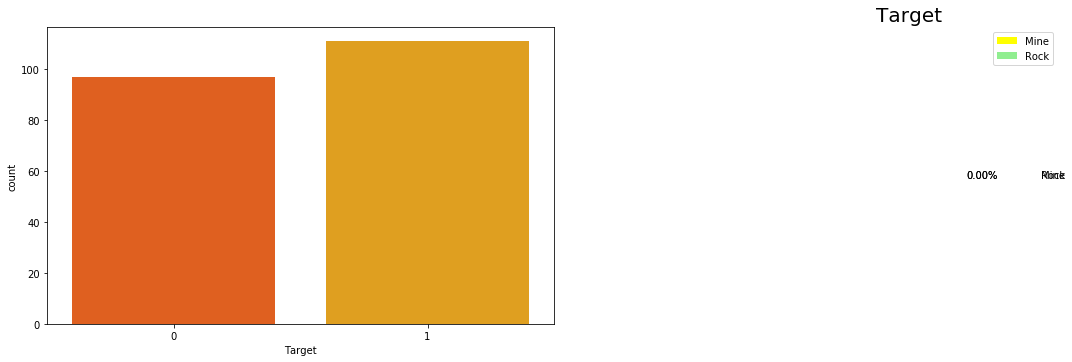

In [16]:
import seaborn as  sns
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='Target', data=dataset, palette='autumn')

plt.subplot(2,2,2)
Mine = dataset.Target[dataset.Target == 'M'].count()
Rock = dataset.Target[dataset.Target == 'R'].count()
plt.title("Target", {"fontsize":20})
plt.pie([Mine, Rock], labels=['Mine', 'Rock'], explode=[0.01,0.01], autopct='%.2f%%', colors=['yellow', 'lightgreen'])
plt.legend()
plt.show()

# # Model prediction
Algorithms used:

Logistic Regression
Decision Tree Classifier
Random Forest Classifier
GBM Classifier
XGBoost Classifier
Light GBM classifier
Catboost classifier
KNN Classifier
Support Vector Classifier (Linear SVM, Kernal SVM)
Naive Bayes Classifier

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
seed=9
#preparing models
models=[]

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('XGBoost Classifier',XGBClassifier()))
models.append(('Light GBM classifier',LGBMClassifier()))
models.append(('KNN Classifier',KNeighborsClassifier()))
models.append(('Support Vector Classifier',SVC()))
models.append(('Naive Bayes Classifier',GaussianNB()))
models.append

result=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# standardized the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('DTC', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('XGB', Pipeline([('Scaler', StandardScaler()), ('XGB', XGBClassifier())])))
pipelines.append(('LGBM', Pipeline([('Scaler', StandardScaler()), ('GMB', LGBMClassifier())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('RFC', Pipeline([('Scaler', StandardScaler()), ('RFC', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

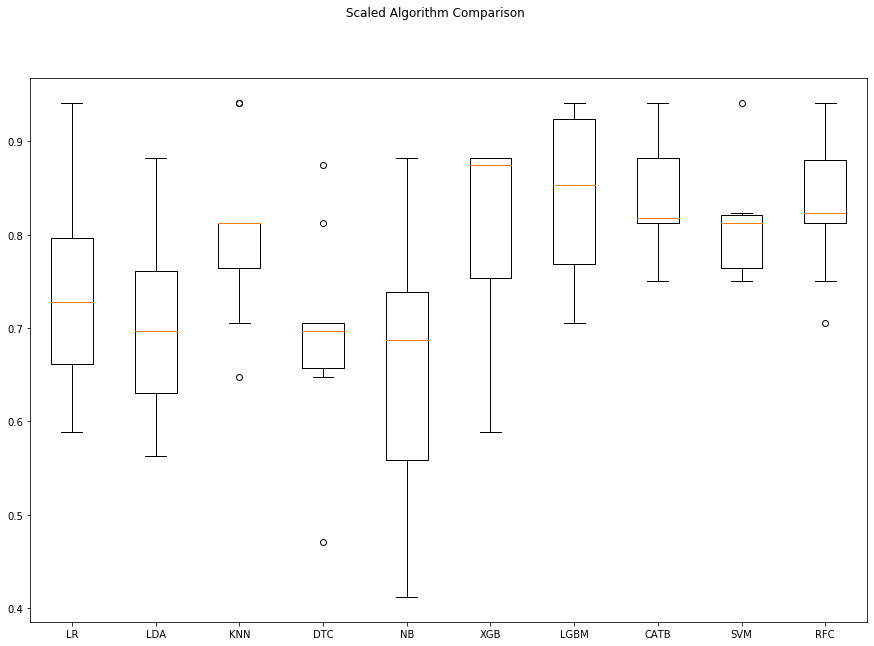

In [21]:
from matplotlib import pyplot as plt
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,10)
plt.show()

In [23]:
# KNN algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaled_X = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaled_X, y_train)

In [24]:
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.867279 using {'n_neighbors': 1}
#1 0.867279 (0.073941) with: {'n_neighbors': 1}
#2 0.819485 (0.079099) with: {'n_neighbors': 3}
#3 0.795221 (0.087945) with: {'n_neighbors': 5}
#4 0.770956 (0.082636) with: {'n_neighbors': 7}
#5 0.747426 (0.077242) with: {'n_neighbors': 9}
#7 0.710662 (0.108541) with: {'n_neighbors': 11}
#11 0.698529 (0.116179) with: {'n_neighbors': 13}
#10 0.703676 (0.143460) with: {'n_neighbors': 15}
#6 0.716176 (0.100762) with: {'n_neighbors': 17}
#7 0.710662 (0.118848) with: {'n_neighbors': 19}
#9 0.704044 (0.106354) with: {'n_neighbors': 21}


In [25]:
# # XGB: 0.813235 (0.093657) algorithm tuning

param_XGB = {'n_estimators': [50, 100, 200],'learning_rate': [0.01,0.1,1]}
xgb_model = XGBClassifier()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=xgb_model, param_grid=param_XGB, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaled_X, y_train)

In [26]:
print(' Best : %f using %s' % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

 Best : 0.819485 using {'learning_rate': 0.1, 'n_estimators': 200}
#8 0.741544 (0.083869) with: {'learning_rate': 0.01, 'n_estimators': 50}
#9 0.741176 (0.075385) with: {'learning_rate': 0.01, 'n_estimators': 100}
#7 0.759191 (0.091650) with: {'learning_rate': 0.01, 'n_estimators': 200}
#6 0.801471 (0.095305) with: {'learning_rate': 0.1, 'n_estimators': 50}
#5 0.813235 (0.093657) with: {'learning_rate': 0.1, 'n_estimators': 100}
#1 0.819485 (0.071070) with: {'learning_rate': 0.1, 'n_estimators': 200}
#2 0.813971 (0.093692) with: {'learning_rate': 1, 'n_estimators': 50}
#2 0.813971 (0.093692) with: {'learning_rate': 1, 'n_estimators': 100}
#2 0.813971 (0.093692) with: {'learning_rate': 1, 'n_estimators': 200}


In [27]:
# LGBM: 0.843382 (0.082129) algorithm tuning
param_LGBM = {'n_estimators':range(100,201,25),'learning_rate':[0.01,0.1,1],
             'max_depth':[7,8,9]}
lgbm_model = LGBMClassifier()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=lgbm_model, param_grid=param_LGBM, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaled_X, y_train)



In [ ]:
print(' Best : %f using %s' % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

In [31]:
#SVM: 0.806985 (0.052207) hyper-tuning

para_SVM= {'C': [1,5,10],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4]}
SVM_model=SVC()
kfold=KFold(n_splits=10)
grid=GridSearchCV(estimator=SVM_model,param_grid=para_SVM,scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaled_X,y_train)

In [32]:
print('Best : %f using %s' % (grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
ranks=grid_result.cv_results_['rank_test_score']
print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best : 0.879779 using {'C': 5, 'degree': 1, 'kernel': 'rbf'}
#45 0.795588 (0.064819) with: {'depth': 8, 'iterations': 800, 'learning_rate': 1}


In [38]:
# RFC: 0.837132 (0.038736) hyper-tuning

para_rfc= {'n_estimators': [5,20,50,100],
# Number of features to consider at every split
'max_features': ['auto', 'sqrt'],
# Maximum number of levels in tree
'max_depth':[2,4],
# Minimum number of samples required to split a node
'min_samples_split': [2, 5],
# Minimum number of samples required at each leaf node
'min_samples_leaf' : [1, 2],
# Method of selecting samples for training each tree
'bootstrap':[True, False]}
RFC_model=RandomForestClassifier()
kfold=KFold(n_splits=10)
grid=GridSearchCV(estimator=RFC_model,param_grid=para_rfc,scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaled_X,y_train)

In [39]:
print('Best : %f using %s' % (grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
ranks=grid_result.cv_results_['rank_test_score']
print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best : 0.848897 using {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
#45 0.795588 (0.064819) with: {'depth': 8, 'iterations': 800, 'learning_rate': 1}


In [73]:

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=5) # rbf is default kernel
model.fit(rescaledX, y_train.replace({1:'M',0:'R'}))

SVC(C=5)

In [92]:
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test.replace({1:'M',0:'R'}), predictions))
print(confusion_matrix(y_test.replace({1:'M',0:'R'}), predictions))
print(classification_report(y_test.replace({1:'M',0:'R'}), predictions))

0.9285714285714286
[[21  0]
 [ 3 18]]
              precision    recall  f1-score   support

           M       0.88      1.00      0.93        21
           R       1.00      0.86      0.92        21

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42



In [93]:
predictions

array(['R', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'R'], dtype=object)

In [91]:
y_test.replace({1:'M',0:'R'})

12     R
80     R
33     R
5      R
187    M
83     R
116    M
122    M
90     R
154    M
45     R
156    M
52     R
189    M
96     R
86     R
204    M
37     R
66     R
18     R
170    M
15     R
7      R
55     R
92     R
134    M
125    M
124    M
158    M
184    M
75     R
149    M
138    M
71     R
186    M
145    M
176    M
118    M
16     R
135    M
190    M
22     R
Name: Target, dtype: object